In [45]:
import utils
import importlib
importlib.reload(utils)

lorenz,time=utils.integrationLorenz(epoch=350,delta_t=0.1)
lorenz_x,lorenz_y,lorenz_z=lorenz

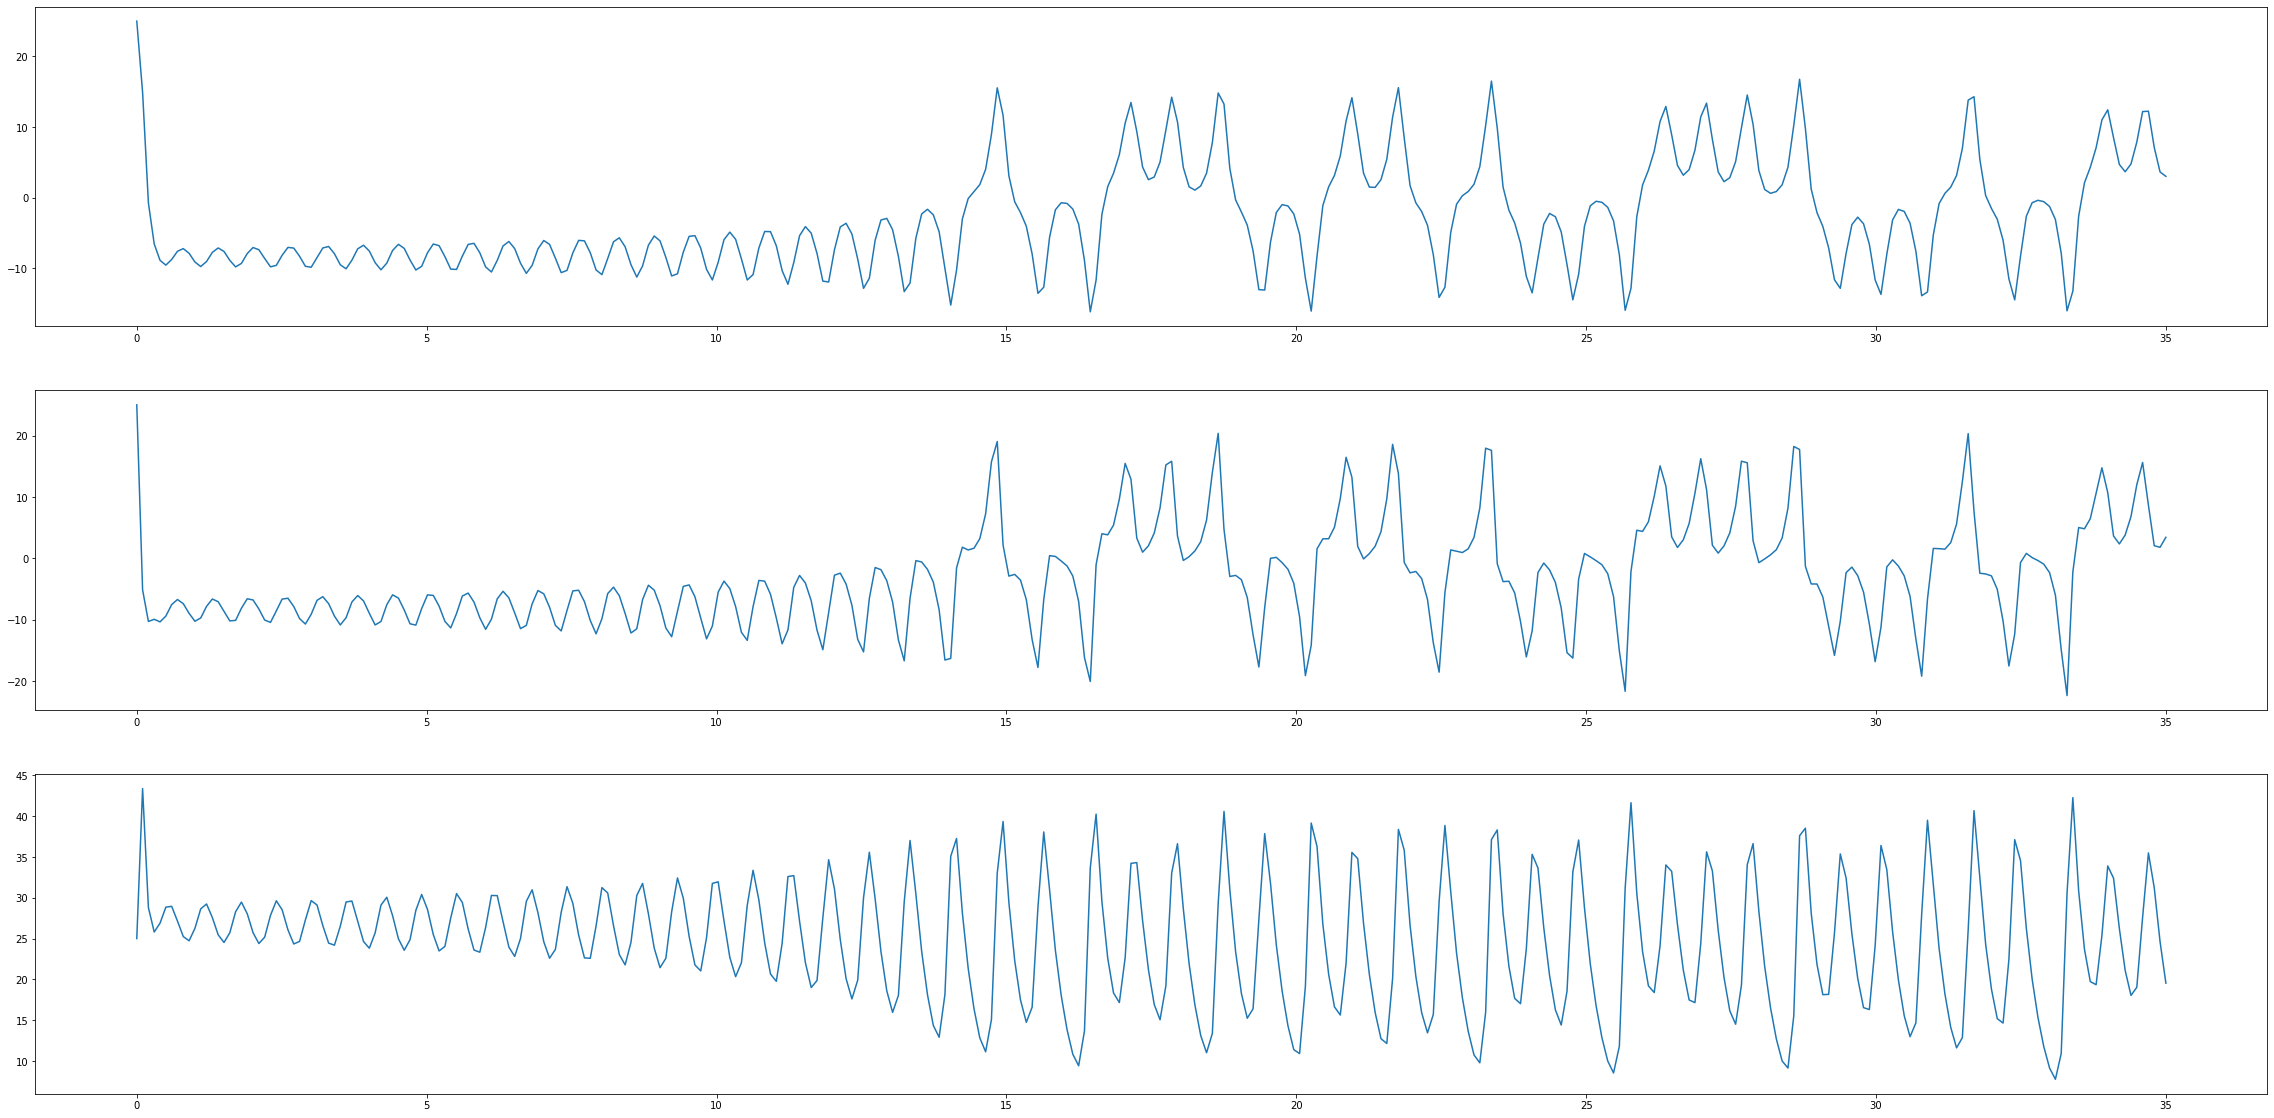

In [46]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(40)
fig.set_figheight(20)
plt.subplot(311)
plt.plot(time,lorenz_x)
plt.subplot(312)
plt.plot(time,lorenz_y)
plt.subplot(313)
plt.plot(time,lorenz_z)

plt.show()

In [47]:
import model
importlib.reload(model)

RP = model.reservoirModel()
print("W_out before_training:\n",RP.W_out)
RP.training()
print("W_out after_training:\n",RP.W_out)

output,_=RP.run_by_self()

forced_output,_ = RP.run_with_input()


W_out before_training:
 tensor([[0.4167, 0.0191, 0.6310],
        [0.7831, 0.4592, 0.9806],
        [0.2891, 0.6375, 0.4749],
        ...,
        [0.3606, 0.6790, 0.2490],
        [0.9553, 0.7378, 0.5431],
        [0.1197, 0.5203, 0.1438]], dtype=torch.float64)
100
W_out after_training:
 tensor([[ 0.1166, -0.0605, -0.9431],
        [ 0.0679,  0.2519,  0.0509],
        [ 0.3751,  0.7777, -0.8049],
        ...,
        [-0.0903, -0.3065, -0.0138],
        [ 0.2240,  0.5092, -0.4168],
        [-0.0424,  0.0356, -0.0274]], dtype=torch.float64)


/home/bfish/projects/reservoirtoy/model.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(self.system_input[epoch])
/home/bfish/projects/reservoirtoy/model.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(torch.tensor(np.tanh(np.dot(self.W_reservoir,prev)))+torch.tensor(feed_to_reservoir))
/home/bfish/projects/reservoirtoy/model.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reference_outputs = torch.tensor(self.system_input[1:self.training_time+1])
/home/bfish/projects/reservoirtoy/m

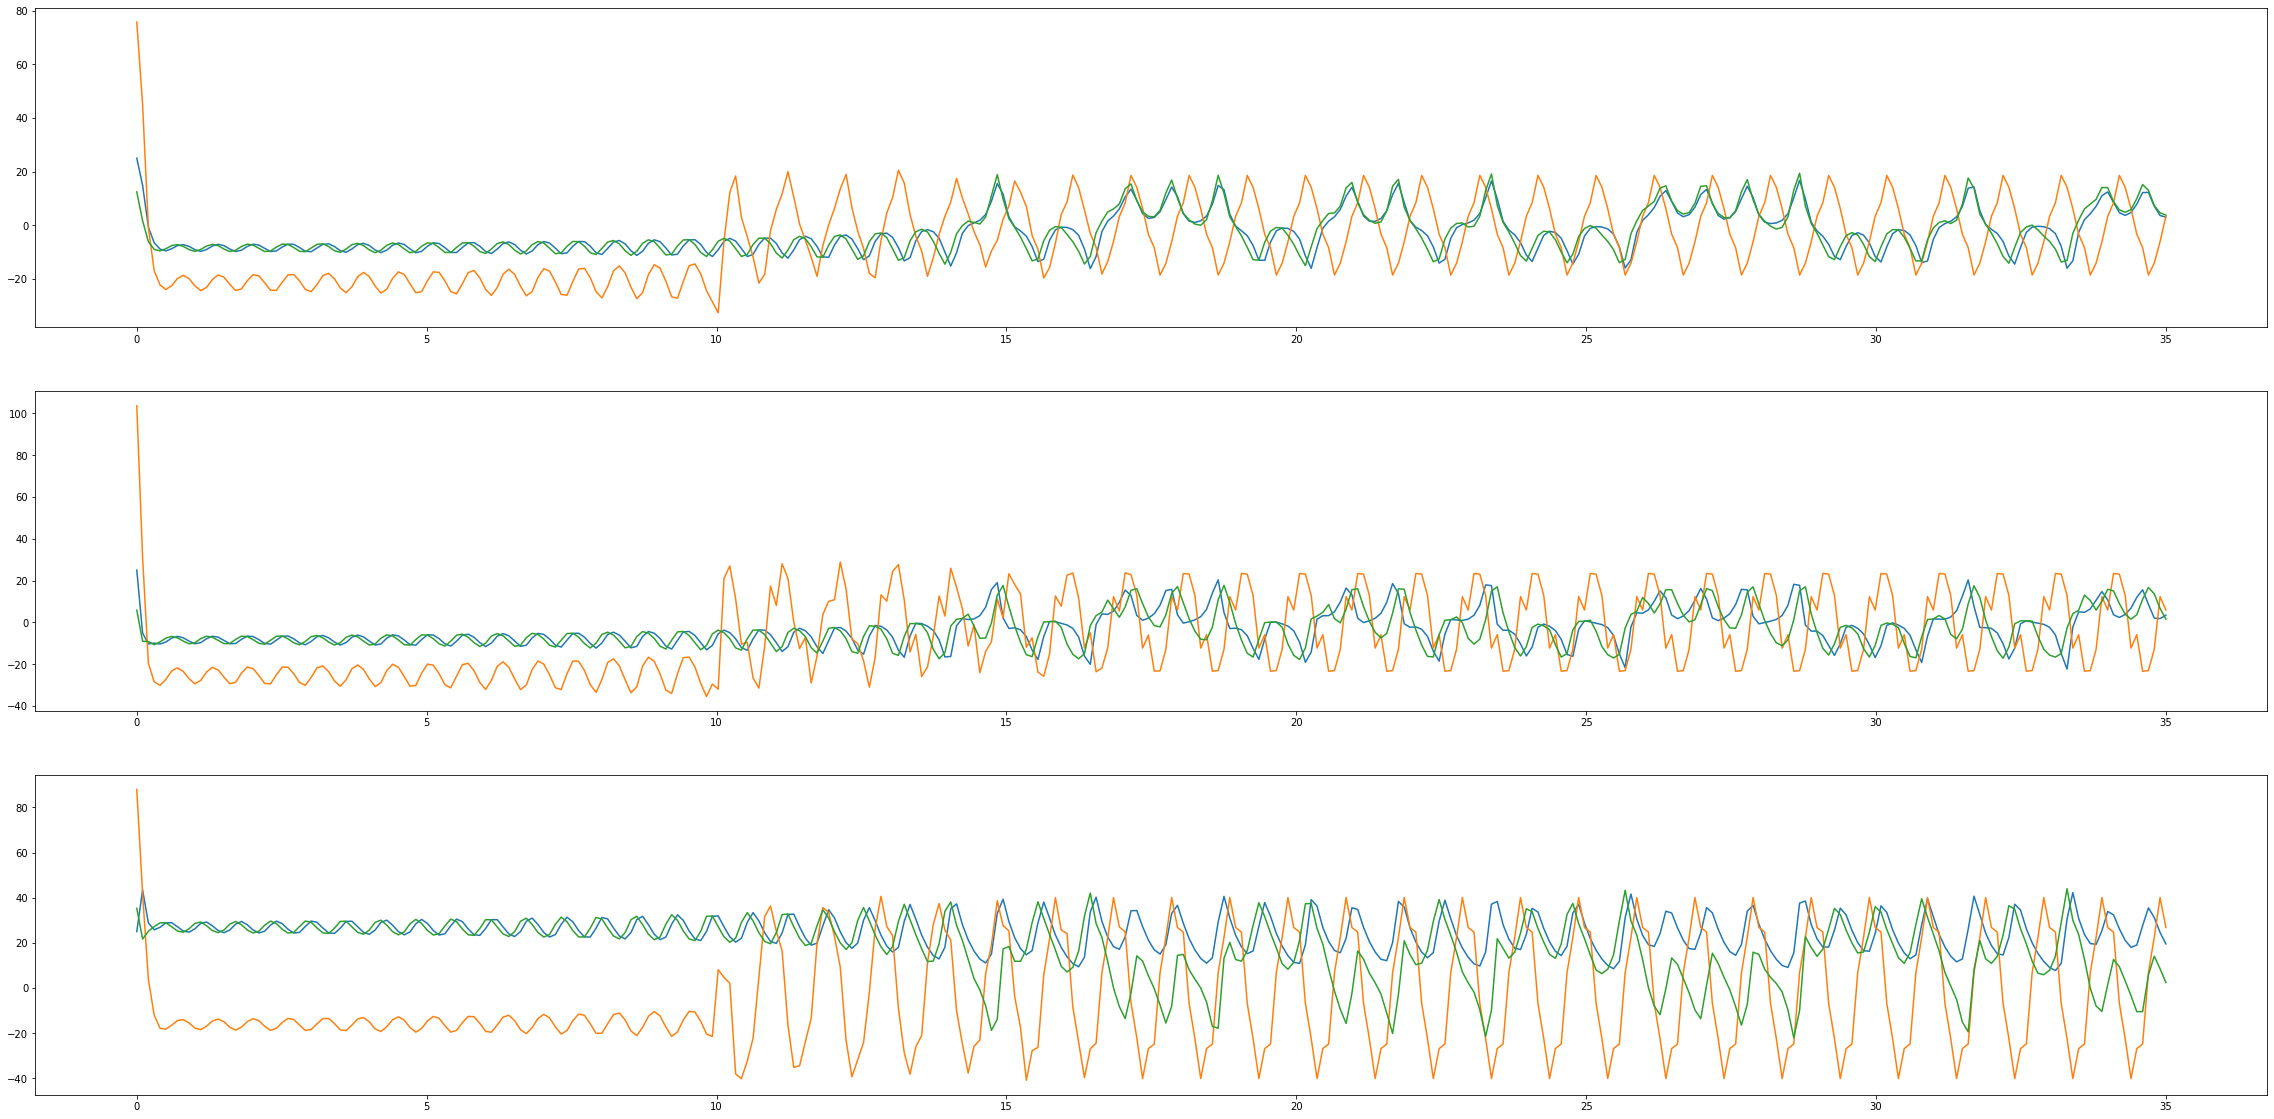

In [48]:
fig2=plt.figure()
fig2.set_figwidth(40)
fig2.set_figheight(20)

plt.subplot(311)
plt.plot(time,lorenz_x)
plt.plot(time,output.T[0])
plt.plot(time,forced_output.T[0])
plt.subplot(312)
plt.plot(time,lorenz_y)
plt.plot(time,output.T[1])
plt.plot(time,forced_output.T[1])
plt.subplot(313)
plt.plot(time,lorenz_z)
plt.plot(time,output.T[2])
plt.plot(time,forced_output.T[2])
plt.show()